##### Problem Statement :Perform Exploratory Data Analysis on DC Crime to draw insights for model training
 

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msn
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

##### 1. Data Ingestion & Data Preparation
###### Dataset origin: https://opendata.dc.gov/datasets/c5a9f33ffca546babbd91de1969e742d_6/explore
###### Dataset includes data collected between Jan - Nov 2024

In [64]:
df = pd.read_csv('dc_crime_nov_2024.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24535 entries, 0 to 24534
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   X                     24535 non-null  float64
 1   Y                     24535 non-null  float64
 2   CCN                   24535 non-null  int64  
 3   REPORT_DAT            24535 non-null  object 
 4   SHIFT                 24535 non-null  object 
 5   METHOD                24535 non-null  object 
 6   OFFENSE               24535 non-null  object 
 7   BLOCK                 24535 non-null  object 
 8   XBLOCK                24535 non-null  float64
 9   YBLOCK                24535 non-null  float64
 10  WARD                  24531 non-null  float64
 11  ANC                   24531 non-null  object 
 12  DISTRICT              24114 non-null  float64
 13  PSA                   24119 non-null  float64
 14  NEIGHBORHOOD_CLUSTER  24531 non-null  object 
 15  BLOCK_GROUP        

In [65]:
df.shape

(24535, 25)

In [66]:
df.head()

,X,Y,CCN,REPORT_DAT,SHIFT,METHOD,OFFENSE,BLOCK,XBLOCK,YBLOCK,...,BLOCK_GROUP,CENSUS_TRACT,VOTING_PRECINCT,LATITUDE,LONGITUDE,BID,START_DATE,END_DATE,OBJECTID,OCTO_RECORD_ID
0,400312.4400,142393.1900,24078668,2024/05/25 16:44:12+00,DAY,OTHERS,THEFT F/AUTO,700 - 742 BLOCK OF DELAFIELD STREET NE,400312.440000,142393.190000,...,009509 3,9509.0,Precinct 66,38.949437,-76.996396,NaN,2024/05/25 01:00:00+00,2024/05/25 11:00:00+00,618324226,NaN
1,405525.0541,136452.0801,24423683,2024/10/11 21:42:38+00,EVENING,OTHERS,THEFT/OTHER,4500 - 4599 BLOCK OF EADS PLACE NE,405525.054147,136452.080124,...,007803 2,7803.0,Precinct 98,38.895900,-76.936310,NaN,2024/09/24 17:31:00+00,2024/09/24 17:32:00+00,618324264,NaN
2,405106.8646,135146.1590,24067641,2024/05/06 06:29:53+00,MIDNIGHT,GUN,ROBBERY,4400 - 4499 BLOCK OF TEXAS AVENUE SE,405106.864611,135146.159035,...,007703 1,7703.0,Precinct 103,38.884138,-76.941140,NaN,2024/05/06 02:15:00+00,2024/05/06 04:49:00+00,618324276,NaN
3,394088.4600,138708.7200,24089539,2024/06/13 01:45:07+00,EVENING,OTHERS,THEFT/OTHER,1851 - 2008 BLOCK OF WISCONSIN AVENUE NW,394088.460000,138708.720000,...,000102 1,102.0,Precinct 5,38.916226,-77.068165,NaN,2024/06/12 22:15:00+00,2024/06/12 22:17:00+00,618324311,NaN
4,400432.5200,130639.2600,24160635,2024/10/17 02:34:47+00,EVENING,OTHERS,THEFT/OTHER,710 - 798 BLOCK OF ALABAMA AVENUE SE,400432.520000,130639.260000,...,009804 1,9804.0,Precinct 122,38.843553,-76.995018,NaN,2024/10/16 20:11:00+00,2024/10/16 21:22:00+00,618324322,NaN


In [67]:
df.tail()

,X,Y,CCN,REPORT_DAT,SHIFT,METHOD,OFFENSE,BLOCK,XBLOCK,YBLOCK,...,BLOCK_GROUP,CENSUS_TRACT,VOTING_PRECINCT,LATITUDE,LONGITUDE,BID,START_DATE,END_DATE,OBJECTID,OCTO_RECORD_ID
24530,396046.20,138387.65,24015980,2024/02/01 05:26:08+00,MIDNIGHT,OTHERS,THEFT/OTHER,1700 - 1799 BLOCK OF CONNECTICUT AVENUE NW,396046.200000,138387.650000,...,004202 2,4202.0,Precinct 14,38.913345,-77.045589,DUPONT CIRCLE,2024/02/01 03:52:00+00,2024/02/01 03:53:00+00,618881138,NaN
24531,396455.48,139555.85,24018602,2024/02/06 03:05:47+00,EVENING,OTHERS,THEFT/OTHER,1737 - 1776 BLOCK OF COLUMBIA ROAD NW,396455.480000,139555.850000,...,003901 2,3901.0,Precinct 35,38.923870,-77.040876,ADAMS MORGAN,2024/02/06 01:27:00+00,2024/02/06 01:35:00+00,618881139,NaN
24532,400687.19,137300.09,24021951,2024/02/12 04:20:28+00,MIDNIGHT,OTHERS,BURGLARY,1001 - 1100 BLOCK OF FLORIDA AVENUE NE,400687.190000,137300.090000,...,008802 3,8802.0,Precinct 77,38.903556,-76.992078,NaN,2024/02/12 00:57:00+00,2024/02/12 01:05:00+00,618881144,NaN
24533,398358.20,137185.34,24145015,2024/09/20 01:31:11+00,EVENING,OTHERS,THEFT/OTHER,5TH STREET NW AND K STREET NW,398358.199996,137185.339997,...,004703 2,4703.0,Precinct 1,38.902521,-77.018928,MOUNT VERNON TRIANGLE CID,2024/09/19 21:02:00+00,2024/09/19 21:30:00+00,618881146,NaN
24534,399823.20,136784.66,24145358,2024/09/20 14:24:08+00,DAY,OTHERS,THEFT F/AUTO,G STREET NE AND 3RD STREET NE,399823.199998,136784.659996,...,008301 1,8301.0,Precinct 83,38.898913,-77.002038,NaN,2024/09/20 13:30:00+00,2024/09/20 15:10:00+00,618881147,NaN


In [68]:
df.columns

Index(['X', 'Y', 'CCN', 'REPORT_DAT', 'SHIFT', 'METHOD', 'OFFENSE', 'BLOCK',
       'XBLOCK', 'YBLOCK', 'WARD', 'ANC', 'DISTRICT', 'PSA',
       'NEIGHBORHOOD_CLUSTER', 'BLOCK_GROUP', 'CENSUS_TRACT',
       'VOTING_PRECINCT', 'LATITUDE', 'LONGITUDE', 'BID', 'START_DATE',
       'END_DATE', 'OBJECTID', 'OCTO_RECORD_ID'],
      dtype='object')

##### 2. Data Cleaning

In [69]:
df.columns = df.columns.str.lower()

In [70]:
df.columns

Index(['x', 'y', 'ccn', 'report_dat', 'shift', 'method', 'offense', 'block',
       'xblock', 'yblock', 'ward', 'anc', 'district', 'psa',
       'neighborhood_cluster', 'block_group', 'census_tract',
       'voting_precinct', 'latitude', 'longitude', 'bid', 'start_date',
       'end_date', 'objectid', 'octo_record_id'],
      dtype='object')

In [71]:
categorical = list(df.select_dtypes(include='O').columns)
numerical = list(df.select_dtypes(exclude='O').columns)

In [72]:
df[categorical].columns

Index(['report_dat', 'shift', 'method', 'offense', 'block', 'anc',
       'neighborhood_cluster', 'block_group', 'voting_precinct', 'bid',
       'start_date', 'end_date'],
      dtype='object')

In [73]:
df[numerical].columns

Index(['x', 'y', 'ccn', 'xblock', 'yblock', 'ward', 'district', 'psa',
       'census_tract', 'latitude', 'longitude', 'objectid', 'octo_record_id'],
      dtype='object')

In [74]:
df[numerical].describe().T

,count,mean,std,min,25%,50%,75%,max
x,24535.0,3.993110e+05,3026.026605,3.903621e+05,3.972291e+05,3.990720e+05,4.012305e+05,4.078068e+05
y,24535.0,1.377669e+05,3357.597792,1.273002e+05,1.361684e+05,1.378467e+05,1.397509e+05,1.473650e+05
ccn,24535.0,2.411077e+07,168144.365966,5.094764e+06,2.404836e+07,2.409747e+07,2.414165e+07,2.503097e+07
xblock,24535.0,3.993110e+05,3026.026605,3.903622e+05,3.972291e+05,3.990720e+05,4.012305e+05,4.078068e+05
yblock,24535.0,1.377669e+05,3357.597791,1.273002e+05,1.361684e+05,1.378467e+05,1.397509e+05,1.473650e+05
ward,24531.0,4.411683e+00,2.325328,1.000000e+00,2.000000e+00,5.000000e+00,6.000000e+00,8.000000e+00
district,24114.0,3.714149e+00,1.848474,1.000000e+00,2.000000e+00,4.000000e+00,5.000000e+00,7.000000e+00
psa,24119.0,3.760931e+02,184.445508,1.010000e+02,2.070000e+02,4.010000e+02,5.060000e+02,7.080000e+02
census_tract,24523.0,7.622522e+03,35834.239535,1.010000e+02,3.500000e+03,7.203000e+03,9.102000e+03,9.800000e+05
latitude,24535.0,3.890776e+01,0.030245,3.881347e+01,3.889335e+01,3.890848e+01,3.892563e+01,3.899422e+01


In [75]:
df.isnull().sum()

x                           0
y                           0
ccn                         0
report_dat                  0
shift                       0
method                      0
offense                     0
block                       0
xblock                      0
yblock                      0
ward                        4
anc                         4
district                  421
psa                       416
neighborhood_cluster        4
block_group                12
census_tract               12
voting_precinct             4
latitude                    0
longitude                   0
bid                     19957
start_date                  5
end_date                 1764
objectid                    0
octo_record_id          24535
dtype: int64

#### Insight:
###### Features with large quantity of null values will be dropped
###### For categorical features we will fill the null rows with mode or empty string

In [76]:
df[numerical].isnull().sum()

x                     0
y                     0
ccn                   0
xblock                0
yblock                0
ward                  4
district            421
psa                 416
census_tract         12
latitude              0
longitude             0
objectid              0
octo_record_id    24535
dtype: int64

##### Insight:
###### 'ward','district','psa' and 'census_tract' null values will be filled with median values
###### due to high volume of null values for 'octo_record_id' the feature will be dropped 

In [77]:
for col in ['ward','district','psa','census_tract']:
    df[col].fillna(df[col].median(), inplace=True)

In [78]:
# drop the 'octo_recod_id'
df.drop(columns='octo_record_id', inplace=True)

In [79]:
df.shape

(24535, 24)

In [80]:
df[categorical].isnull().sum()

report_dat                  0
shift                       0
method                      0
offense                     0
block                       0
anc                         4
neighborhood_cluster        4
block_group                12
voting_precinct             4
bid                     19957
start_date                  5
end_date                 1764
dtype: int64

##### Insight:
###### For the following features 'anc','neighborhood_cluster','block_group','voting_precinct', I will replace the null values with the mode of each feature
###### Since 'bid' has large number of missing values, it will be dropped
###### missing values of'start_date' and 'end_date' will be filled by the corresponding reported_date feature

In [81]:
for col in ['anc','neighborhood_cluster','block_group','voting_precinct']:
    df[col].fillna(value=df[col].mode()[0], inplace=True)

In [82]:
df.isnull().sum()

x                           0
y                           0
ccn                         0
report_dat                  0
shift                       0
method                      0
offense                     0
block                       0
xblock                      0
yblock                      0
ward                        0
anc                         0
district                    0
psa                         0
neighborhood_cluster        0
block_group                 0
census_tract                0
voting_precinct             0
latitude                    0
longitude                   0
bid                     19957
start_date                  5
end_date                 1764
objectid                    0
dtype: int64

In [83]:
# drop the bid feature
df.drop(columns='bid', inplace=True)

In [84]:
df.shape

(24535, 23)

In [85]:
df.start_date.value_counts()

start_date
2024/05/10 17:00:00+00    6
2024/10/18 21:00:00+00    6
2024/10/10 23:00:00+00    6
2024/06/09 04:00:00+00    5
2024/05/31 04:00:00+00    5
                         ..
2024/07/27 16:13:00+00    1
2024/07/27 00:00:00+00    1
2024/07/27 02:22:00+00    1
2024/07/25 22:39:00+00    1
2024/09/20 13:30:00+00    1
Name: count, Length: 22091, dtype: int64

In [86]:
df[df['start_date'].isnull()]

,x,y,ccn,report_dat,shift,method,offense,block,xblock,yblock,...,psa,neighborhood_cluster,block_group,census_tract,voting_precinct,latitude,longitude,start_date,end_date,objectid
4913,399162.790,137319.7000,24153130,2024/10/03 16:50:51+00,DAY,OTHERS,THEFT/OTHER,1 - 39 BLOCK OF L STREET NW,399162.790000,137319.700000,...,102.0,Cluster 8,004704 1,4704.0,Precinct 1,38.903733,-77.009652,NaN,NaN,618647552
8579,397229.120,138854.5400,24170758,2024/11/03 05:21:58+00,MIDNIGHT,OTHERS,MOTOR VEHICLE THEFT,2000 - 2099 BLOCK OF 14TH STREET NW,397229.120000,138854.540000,...,305.0,Cluster 3,004401 2,4401.0,Precinct 22,38.917555,-77.031951,NaN,NaN,618663495
11642,401627.937,132937.3269,24021001,2024/02/10 07:51:29+00,MIDNIGHT,OTHERS,ASSAULT W/DANGEROUS WEAPON,1600 - 1699 BLOCK OF V STREET SE,401627.936959,132937.326937,...,701.0,Cluster 28,007504 2,7504.0,Precinct 114,38.864253,-76.981242,NaN,NaN,618669516
12081,393930.750,143053.2700,24089639,2024/06/13 03:01:05+00,MIDNIGHT,OTHERS,THEFT F/AUTO,5000 - 5099 BLOCK OF CONNECTICUT AVENUE NW,393930.750000,143053.270000,...,203.0,Cluster 10,001402 3,1402.0,Precinct 138,38.955362,-77.070022,NaN,NaN,618671306
20392,397426.470,139181.2553,24014779,2024/01/30 05:34:53+00,MIDNIGHT,OTHERS,MOTOR VEHICLE THEFT,13TH STREET NW AND FLORIDA AVENUE NW,397426.470012,139181.255295,...,304.0,Cluster 2,003600 1,3600.0,Precinct 23,38.920499,-77.029677,NaN,NaN,618858321


In [87]:
df.shape

(24535, 23)

In [ ]:
# fill the null value with corresponding report_dat value
df['start_date'].fillna(value=df['report_dat'], inplace=True)

In [89]:
df.start_date.isnull().sum()

0

In [90]:
# fill the null values with corresponding start_date values
df['end_date'].fillna(value=df['start_date'], inplace=True)

In [91]:
df.end_date.isnull().sum()

0

In [92]:
df.isnull().sum()

x                       0
y                       0
ccn                     0
report_dat              0
shift                   0
method                  0
offense                 0
block                   0
xblock                  0
yblock                  0
ward                    0
anc                     0
district                0
psa                     0
neighborhood_cluster    0
block_group             0
census_tract            0
voting_precinct         0
latitude                0
longitude               0
start_date              0
end_date                0
objectid                0
dtype: int64

##### 3. EDA

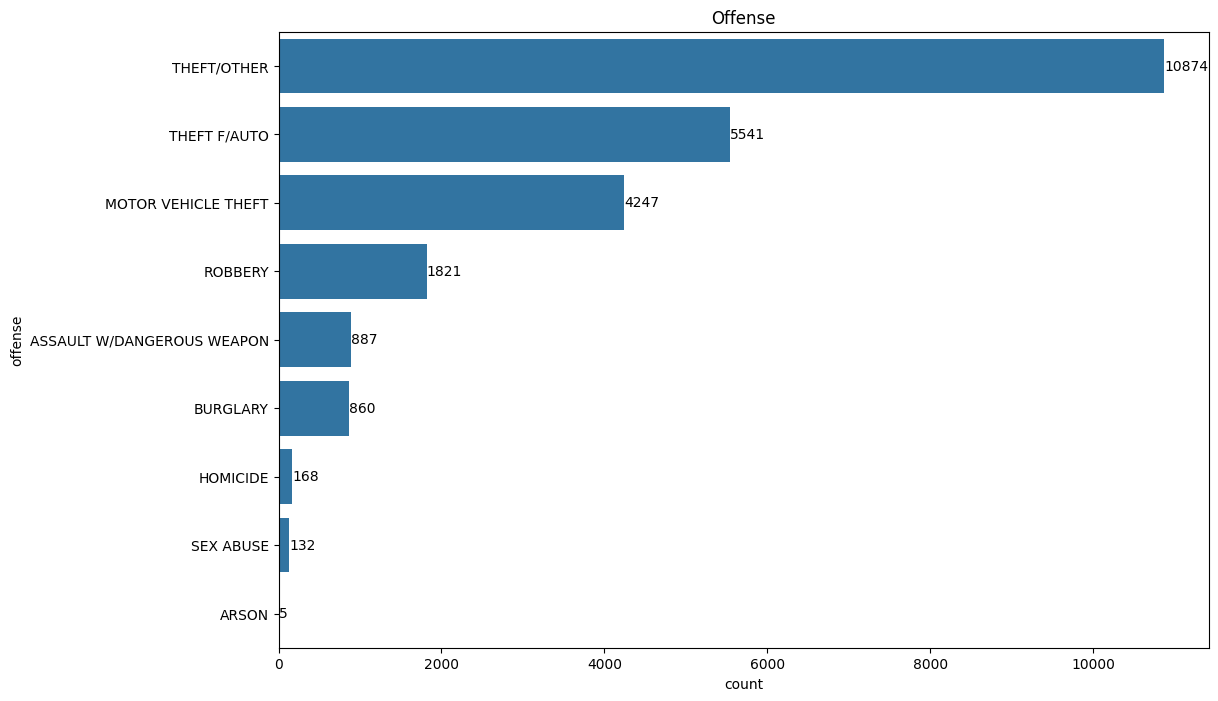

In [93]:
plt.figure(figsize=(12,8))
plt.title("Offense")
ax = sns.countplot(data = df, y='offense',
              order = df['offense'].value_counts().index)
for container in ax.containers:
    ax.bar_label(container)

##### Insight: We see that Theft(other/auto and motor vehicle) is the most frequent crime commited in dc, which is inline with other American states.

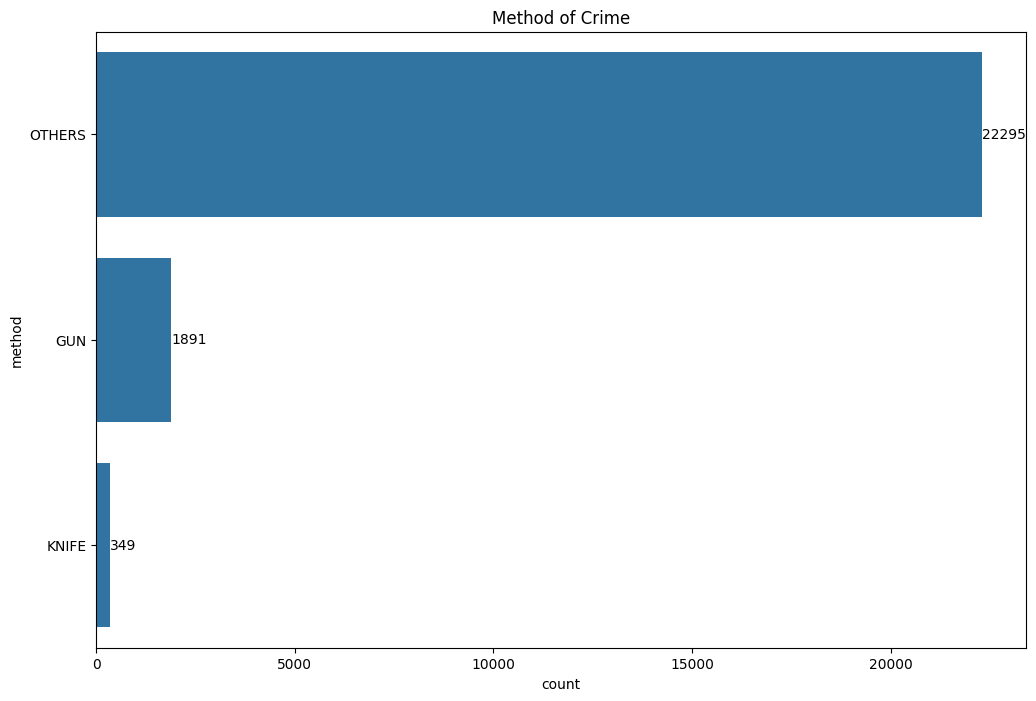

In [95]:
plt.figure(figsize=(12,8))
plt.title("Method of Crime")
ax = sns.countplot(data = df, y='method',
              order = df['method'].value_counts().index)
for container in ax.containers:
    ax.bar_label(container)

##### Insight:
###### 1. Majority of the crimes committed did not involve the use of guns or knives
###### 1. Guns are more likely to be used than knives during crimes


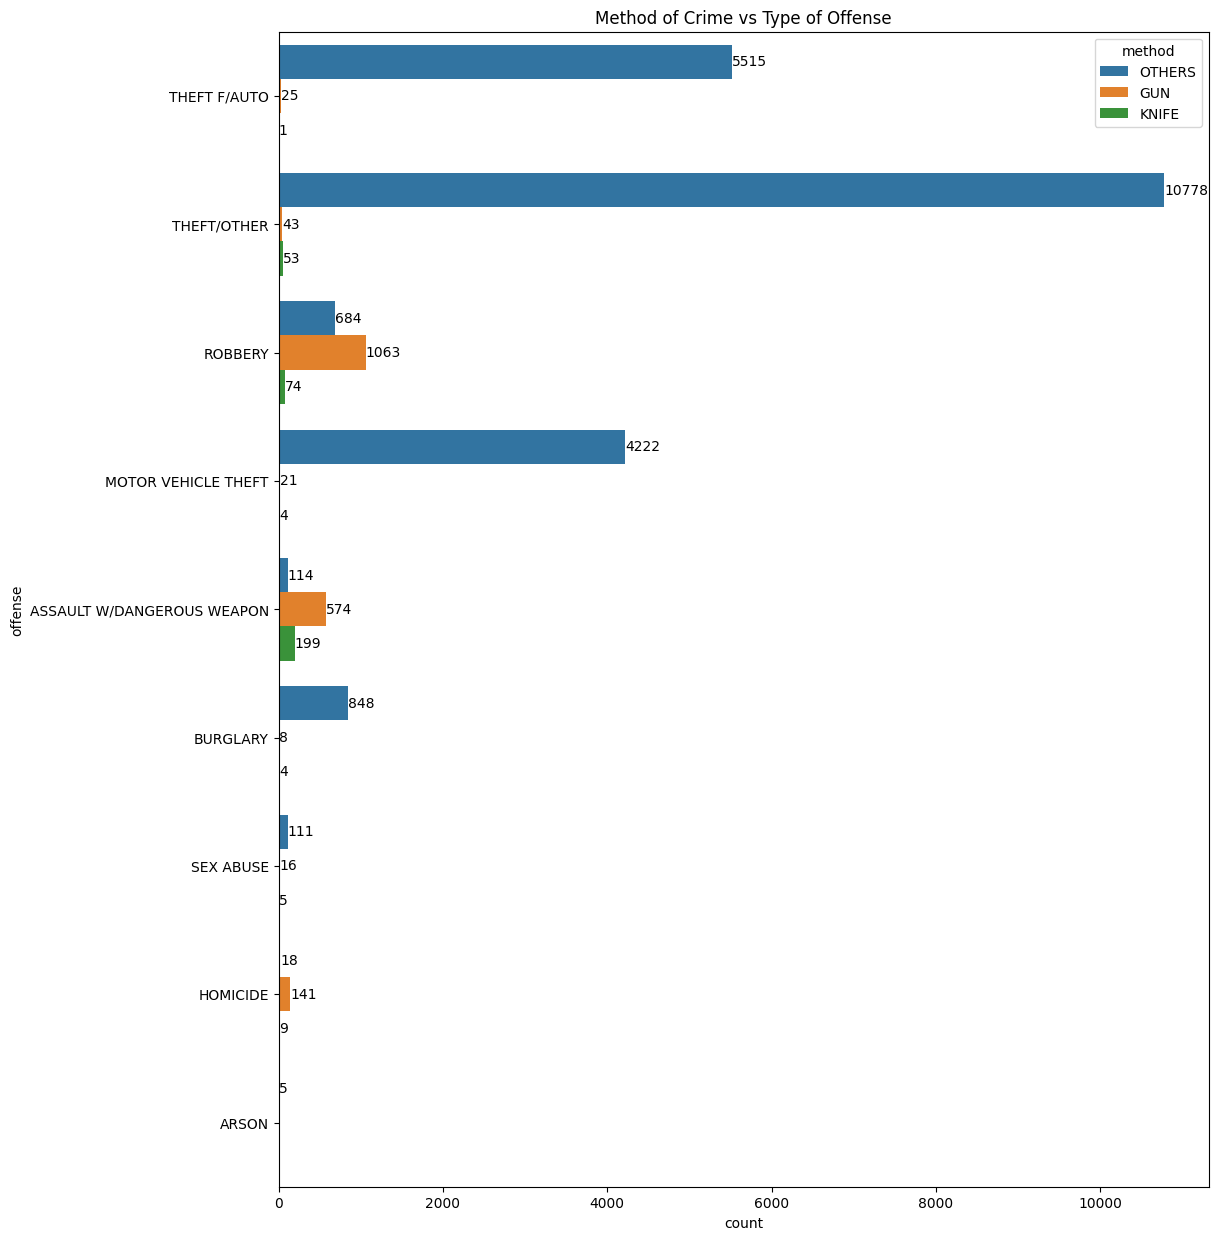

In [98]:
plt.figure(figsize=(12,15))
plt.title("Method of Crime vs Type of Offense")
ax = sns.countplot(data = df, y= df['offense'], hue=df['method'])
for container in ax.containers:
    ax.bar_label(container)

##### Insight:
###### 1. Serious crimes (Robbery, Assault with dangerous weapon and homicide) mostly involved the use of guns
###### 2. Less serious crimes such as Theft did not involve neither guns nor knives